In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dogs-vs-cats/test1.zip
/kaggle/input/dogs-vs-cats/train.zip
/kaggle/input/dogs-vs-cats/sampleSubmission.csv


## Veri Seti Dosyaları

Kaggle ortamında bulunan **Dogs vs Cats** veri seti dosyaları:

Sonuç:

- `/kaggle/input/dogs-vs-cats/test1.zip`
- `/kaggle/input/dogs-vs-cats/train.zip`
- `/kaggle/input/dogs-vs-cats/sampleSubmission.csv`


In [2]:
import zipfile

# Train ve test zip dosyalarını çıkar
with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/train.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/train_data')

with zipfile.ZipFile('/kaggle/input/dogs-vs-cats/test1.zip', 'r') as zip_ref:
    zip_ref.extractall('/kaggle/working/test_data')

print("Train ve test veri setleri çıkarıldı!")


Train ve test veri setleri çıkarıldı!


## Veri Setlerinin Açılması
Bu adımda, Kaggle ortamındaki **Dogs vs Cats** veri setindeki `train` ve `test` zip dosyaları açılmaktadır.  
`zipfile` kütüphanesi kullanılarak dosyalar belirtilen çalışma dizinine çıkarılır.  
Kod çalıştırıldığında, hem eğitim hem test verileri kullanılabilir hale gelir.

Sonuç:

* Train ve test veri setleri çıkarıldı!

In [3]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Ana klasör
train_dir = "/kaggle/working/train_data/train"

# Kedi ve köpek dosyaları
cats = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if 'cat' in f]
dogs = [os.path.join(train_dir, f) for f in os.listdir(train_dir) if 'dog' in f]

# Eğitim ve doğrulama böl
train_cats, val_cats = train_test_split(cats, test_size=0.2, random_state=42)
train_dogs, val_dogs = train_test_split(dogs, test_size=0.2, random_state=42)

print(f"Eğitim: {len(train_cats) + len(train_dogs)}, Doğrulama: {len(val_cats) + len(val_dogs)}")


Eğitim: 20000, Doğrulama: 5000


## Eğitim ve Doğrulama Veri Setlerinin Oluşturulması

Bu adımda, açılan eğitim verileri **kedi ve köpek görüntüleri** olarak ayrılmaktadır.  
- `os.listdir()` ile klasördeki tüm dosyalar listelenir.  
- Dosya isimlerinde `'cat'` veya `'dog'` geçenler ayrı listelere eklenir.  
- `train_test_split` fonksiyonu kullanılarak veriler **eğitim ve doğrulama** setlerine bölünür (`test_size=0.2` ile %20 doğrulama).  

Sonuç:  
- Eğitim seti: 20.000 görüntü  
- Doğrulama seti: 5.000 görüntü


In [4]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random


2025-09-26 17:58:01.437778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758909481.815714      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758909481.920274      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Gerekli Kütüphanelerin Yüklenmesi

Bu adımda, **veri görselleştirme ve derin öğrenme için gerekli kütüphaneler** import edilmektedir:

- `os`: Dosya ve klasör işlemleri için kullanılır (örn. veri yollarını yönetmek).  
- `matplotlib.pyplot`: Grafik ve görselleştirmeler oluşturmak için kullanılır.  
- `seaborn`: İstatistiksel veri görselleştirme için kullanılır, `matplotlib` üzerine geliştirilmiş.  
- `tensorflow.keras.preprocessing.image.ImageDataGenerator`: Görüntü verilerini **ön işleme ve veri artırma (data augmentation)** için kullanılır.  
- `tensorflow.keras.preprocessing.image`: Tek tek görüntüleri yüklemek ve işlemek için yardımcı fonksiyonlar içerir.  
- `random`: Rastgele seçimler ve örnekleme yapmak için kullanılır (örn. örnek görüntüleri rastgele seçmek).  


Toplam kedi sayısı: 12500
Toplam köpek sayısı: 12500


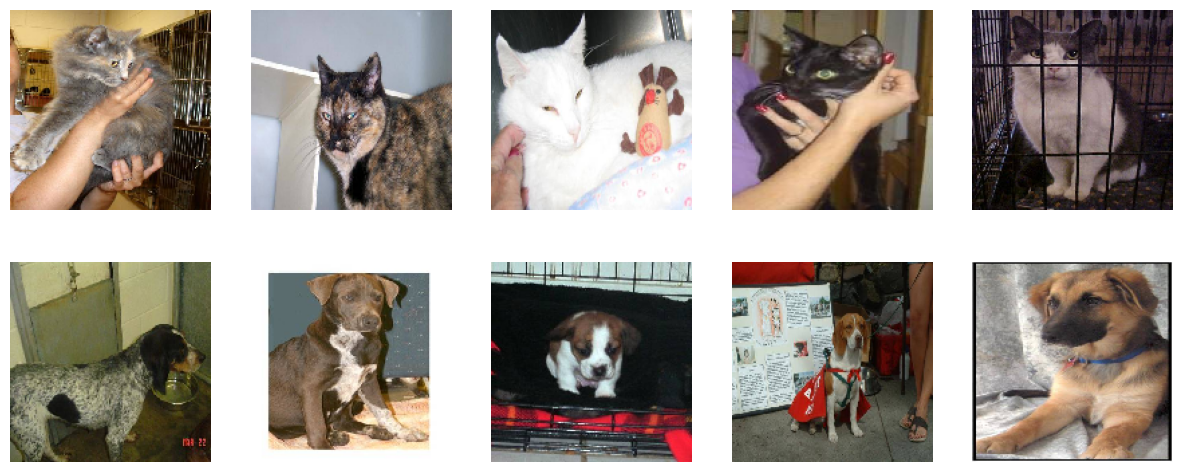

In [5]:
train_dir = '/kaggle/working/train_data/train'  # klasör yolunu kendine göre ayarla

cats = [f for f in os.listdir(train_dir) if 'cat' in f]
dogs = [f for f in os.listdir(train_dir) if 'dog' in f]

print(f"Toplam kedi sayısı: {len(cats)}")
print(f"Toplam köpek sayısı: {len(dogs)}")

# Rastgele birkaç görsel göster
fig, axes = plt.subplots(2, 5, figsize=(15,6))
for i, ax in enumerate(axes.flatten()):
    if i < 5:
        img_path = os.path.join(train_dir, random.choice(cats))
    else:
        img_path = os.path.join(train_dir, random.choice(dogs))
    img = image.load_img(img_path, target_size=(150,150))
    ax.imshow(img)
    ax.axis('off')
plt.show()


## Eğitim Verilerinin İncelenmesi ve Örnek Görseller

Bu adımda, eğitim klasöründeki kedi ve köpek görüntüleri sayılmakta ve rastgele birkaç örnek görsel gösterilmektedir.  

- `os.listdir()` ile klasördeki dosyalar listelenir.  
- Dosya isimlerinde `'cat'` veya `'dog'` geçenler ayrı listelere eklenir.  
- `matplotlib` kullanılarak 2x5 boyutunda rastgele seçilmiş görseller görselleştirilir.  

**Toplam Görüntü Sayıları:**  
- Kedi sayısı: 12.500  
- Köpek sayısı: 12.500  

**Örnek Görseller:**  
Kod çalıştırıldığında, ilk 5 görsel rastgele kedi, sonraki 5 görsel rastgele köpek olarak gösterilir.


In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,       # 0-30 derece döndürme
    width_shift_range=0.2,   # yatay kaydırma
    height_shift_range=0.2,  # dikey kaydırma
    shear_range=0.2,         # kesme (shear)
    zoom_range=0.2,          # yakınlaştırma
    horizontal_flip=True,    # yatay çevirme
    brightness_range=[0.8,1.2],  # renk/brightness jitter
    validation_split=0.2     # train-validation ayrımı
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


## Veri Ön İşleme ve Artırma (Data Augmentation)

Bu adımda, eğitim ve doğrulama verileri için **görüntü ön işleme ve veri artırma** işlemleri tanımlanmaktadır.  

- `ImageDataGenerator` kullanılarak **veri artırma (data augmentation)** yapılır, bu sayede model daha fazla çeşitlilikle eğitilir ve overfitting riski azalır.  

**Eğitim veri artırma parametreleri (`train_datagen`):**  
- `rescale=1./255`: Piksel değerlerini 0-1 aralığına ölçeklendirir.  
- `rotation_range=30`: Görselleri rastgele 0-30 derece döndürür.  
- `width_shift_range=0.2`, `height_shift_range=0.2`: Görselleri yatay ve dikey kaydırır.  
- `shear_range=0.2`: Görselleri kesme (shear) uygular.  
- `zoom_range=0.2`: Rastgele yakınlaştırma yapar.  
- `horizontal_flip=True`: Yatay çevirme uygular.  
- `brightness_range=[0.8,1.2]`: Görsellerin parlaklığını rastgele değiştirir.  
- `validation_split=0.2`: Eğitim ve doğrulama seti ayrımı için %20 doğrulama.  

**Doğrulama veri ön işleme (`val_datagen`):**  
- `rescale=1./255`: Piksel değerlerini ölçeklendirir.  
- `validation_split=0.2`: Eğitim/validation ayrımıyla uyumlu olacak şekilde doğrulama verisi seçilir.


In [7]:
import os
import shutil

base_dir = '/kaggle/working/train_data/train'
cat_dir = os.path.join(base_dir, 'cats')
dog_dir = os.path.join(base_dir, 'dogs')

os.makedirs(cat_dir, exist_ok=True)
os.makedirs(dog_dir, exist_ok=True)

for fname in os.listdir(base_dir):
    src_path = os.path.join(base_dir, fname)

    # Sadece dosyaları taşı, klasörleri atla
    if not os.path.isfile(src_path):
        continue

    if fname.startswith('cat'):
        dst_path = os.path.join(cat_dir, fname)
    elif fname.startswith('dog'):
        dst_path = os.path.join(dog_dir, fname)
    else:
        continue

    # Eğer hedefte aynı dosya varsa isim değiştir
    if os.path.exists(dst_path):
        name, ext = os.path.splitext(fname)
        counter = 1
        while True:
            new_name = f"{name}_{counter}{ext}"
            new_dst_path = os.path.join(os.path.dirname(dst_path), new_name)
            if not os.path.exists(new_dst_path):
                dst_path = new_dst_path
                break
            counter += 1

    shutil.move(src_path, dst_path)
    print(f"Taşındı: {src_path} -> {dst_path}")


Taşındı: /kaggle/working/train_data/train/cat.9043.jpg -> /kaggle/working/train_data/train/cats/cat.9043.jpg
Taşındı: /kaggle/working/train_data/train/cat.10345.jpg -> /kaggle/working/train_data/train/cats/cat.10345.jpg
Taşındı: /kaggle/working/train_data/train/cat.841.jpg -> /kaggle/working/train_data/train/cats/cat.841.jpg
Taşındı: /kaggle/working/train_data/train/dog.4259.jpg -> /kaggle/working/train_data/train/dogs/dog.4259.jpg
Taşındı: /kaggle/working/train_data/train/dog.10657.jpg -> /kaggle/working/train_data/train/dogs/dog.10657.jpg
Taşındı: /kaggle/working/train_data/train/dog.520.jpg -> /kaggle/working/train_data/train/dogs/dog.520.jpg
Taşındı: /kaggle/working/train_data/train/dog.4456.jpg -> /kaggle/working/train_data/train/dogs/dog.4456.jpg
Taşındı: /kaggle/working/train_data/train/cat.12122.jpg -> /kaggle/working/train_data/train/cats/cat.12122.jpg
Taşındı: /kaggle/working/train_data/train/cat.9280.jpg -> /kaggle/working/train_data/train/cats/cat.9280.jpg
Taşındı: /kaggle/

## Kedi ve Köpek Görsellerinin Ayrılması

Bu adımda, eğitim klasöründeki tüm görüntüler **kedi ve köpek olarak ayrı klasörlere** taşınmaktadır.  

- `os.makedirs()` ile `cats` ve `dogs` adlı klasörler oluşturulur (varsa tekrar oluşturulmaz).  
- `os.listdir()` ile klasördeki tüm dosyalar listelenir.  
- Dosya isimleri `'cat'` veya `'dog'` ile başlıyorsa ilgili klasöre taşınır.  
- Eğer taşınacak dosya hedef klasörde zaten varsa, dosya adı numaralandırılarak tekrar taşınır (`filename_1.ext`, `filename_2.ext`...).  
- `shutil.move()` ile dosya taşınır ve işlem ekrana yazdırılır.  

Bu sayede model eğitimi için **kedi ve köpek görüntüleri düzenli klasör yapısına** kavuşur.

**Örnek Çıktı:**  

Taşındı: /kaggle/working/train_data/train/cat.298.jpg -> /kaggle/working/train_data/train/cats/cat.298.jpg


In [8]:
print("Base dizinindeki dosyalar:")
for f in os.listdir(base_dir):
    print(f)

Base dizinindeki dosyalar:
cats
dogs


## Base Dizinindeki Dosyaların Kontrolü

Bu adımda, **ana klasörde (base_dir) hangi dosya veya klasörlerin bulunduğu** listelenmektedir.  

- `os.listdir(base_dir)` ile belirtilen klasördeki tüm dosya ve klasörler alınır.  
- `for` döngüsü ile her bir öğe ekrana yazdırılır.  

Bu sayede, kedi ve köpek görüntülerinin doğru klasörlere taşınıp taşınmadığı hızlıca kontrol edilebilir.

*Sonuç:

Base dizinindeki dosyalar:
dogs
cats


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Eğitim/validation ayırmak için
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)


## Eğitim ve Doğrulama Verileri için Ön İşleme ve Veri Artırma

Bu adımda, eğitim ve doğrulama verileri için **görüntü ön işleme ve veri artırma (data augmentation)** işlemleri tanımlanmaktadır.  

- `ImageDataGenerator` kullanılarak eğitim verileri çeşitlendirilir ve normalizasyon uygulanır.  
- `train_datagen` parametreleri:  
  - `rescale=1./255`: Piksel değerlerini 0-1 aralığına ölçeklendirir.  
  - `rotation_range=20`: Görselleri rastgele ±20 derece döndürür.  
  - `width_shift_range=0.2`, `height_shift_range=0.2`: Görselleri yatay ve dikey kaydırır.  
  - `shear_range=0.15`: Görselleri kesme (shear) uygular.  
  - `zoom_range=0.15`: Rastgele yakınlaştırma yapar.  
  - `horizontal_flip=True`: Görselleri yatay olarak çevirir.  
  - `fill_mode='nearest'`: Kaydırma ve döndürme sonrası boş kalan pikselleri doldurur.  
  - `validation_split=0.2`: Eğitim ve doğrulama seti ayrımı için %20 doğrulama.  

- `val_datagen`: Sadece normalizasyon ve validation split uygulanır.


Seçilen sınıf: cat, dosya: /kaggle/working/train_data/train/cats/cat.6969.jpg


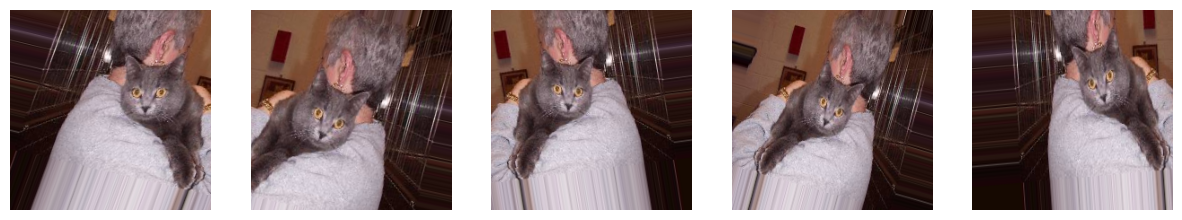

In [10]:
import os
import random
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Klasör yolları
cat_dir = '/kaggle/working/train_data/train/cats'
dog_dir = '/kaggle/working/train_data/train/dogs'

# Klasördeki dosyaları listele
cats = [f for f in os.listdir(cat_dir) if os.path.isfile(os.path.join(cat_dir, f))]
dogs = [f for f in os.listdir(dog_dir) if os.path.isfile(os.path.join(dog_dir, f))]

# Dosyaların boş olup olmadığını kontrol et
if len(cats) == 0 or len(dogs) == 0:
    raise ValueError("Cat veya dog klasörü boş! Dosyaları doğru şekilde yüklediğinizden emin olun.")

# Örnek olarak kedi veya köpek resmini random seç
label_choice = random.choice(['cat', 'dog'])
if label_choice == 'cat':
    sample_img_path = os.path.join(cat_dir, random.choice(cats))
else:
    sample_img_path = os.path.join(dog_dir, random.choice(dogs))

print(f"Seçilen sınıf: {label_choice}, dosya: {sample_img_path}")

# Resmi yükle ve boyutlandır
img_size = (224, 224)
img = image.load_img(sample_img_path, target_size=img_size)
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# Augmentation ve görselleştirme
i = 0
fig, axes = plt.subplots(1, 5, figsize=(15,5))
for batch in train_datagen.flow(x, batch_size=1):
    ax = axes[i]
    # 0-1 float değerler ile imshow doğrudan çalışır, uint8 yapmaya gerek yok
    ax.imshow(batch[0])
    ax.axis('off')
    i += 1
    if i % 5 == 0:
        break
plt.show()


## Örnek Görüntü Üzerinde Veri Artırma (Data Augmentation) Görselleştirmesi

Bu adımda, eğitim verilerinden **rastgele seçilen bir kedi veya köpek görüntüsü** üzerinde veri artırma uygulanmakta ve sonuç görselleştirilmektedir.

- `os.listdir()` ile kedi ve köpek klasörlerindeki dosyalar listelenir.  
- Dosya boş ise hata mesajı verilir.  
- `random.choice()` ile rastgele bir sınıf (`cat` veya `dog`) ve ilgili görüntü seçilir.  
- `image.load_img()` ve `image.img_to_array()` ile resim yüklenir ve array’e dönüştürülür.  
- `train_datagen.flow()` ile veri artırma uygulanır (daha önce tanımlanan `rotation`, `shift`, `flip`, `zoom`, vb.).  
- `matplotlib` kullanılarak artırılmış 5 farklı görüntü yan yana gösterilir.  

Bu yöntem, modelin **farklı açılardan ve varyasyonlardan öğrenmesini** sağlar ve overfitting riskini azaltır.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

img_size = (150, 150, 3)

model = Sequential([
    Input(shape=img_size),  # input_shape yerine Input katmanı
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


I0000 00:00:1758909503.499829      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1758909503.500573      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


## Konvolüsyonel Sinir Ağı (CNN) Modelinin Oluşturulması

Bu adımda, **kedi ve köpek sınıflandırması için CNN tabanlı bir model** tanımlanmaktadır.

- `Sequential` modeli ile katmanlar ardışık olarak eklenir.  
- `Input(shape=img_size)`: Modelin giriş boyutu (150x150 piksel, 3 kanal RGB) belirlenir.  
- `Conv2D` katmanları: Görüntüden özellikleri çıkarır (32, 64, 128 filtre ile, 3x3 kernel).  
- `MaxPooling2D` katmanları: Özellik haritalarını boyut küçültme ile özetler ve işlem maliyetini azaltır.  
- `Flatten()`: Konvolüsyon ve pooling çıktısını tek boyutlu vektöre çevirir.  
- `Dense(512, activation='relu')`: Tam bağlı gizli katman, modelin öğrenmesini sağlar.  
- `Dropout(0.5)`: Overfitting’i azaltmak için %50 nöronları rastgele devre dışı bırakır.  
- `Dense(1, activation='sigmoid')`: Çıkış katmanı, 0 veya 1 değerini tahmin ederek sınıflandırma yapar (kedi veya köpek).

**Not:** TensorFlow, sistemdeki GPU’ları tespit etti ve her birine bellek atadı. 


In [12]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Çünkü binary classification: cat vs dog
    metrics=['accuracy']
)


## Modelin Derlenmesi (Compile)

Bu adımda, CNN modeli **eğitim için derlenir**.

- `optimizer='adam'`: Model ağırlıklarını güncellemek için Adam optimizasyon algoritması kullanılır.  
- `loss='binary_crossentropy'`: Çünkü kedi vs köpek sınıflandırması **iki sınıflı (binary) bir problem**dir.  
- `metrics=['accuracy']`: Eğitim ve doğrulama sırasında modelin başarımı **doğruluk (accuracy)** metriği ile izlenir.


In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

## Model Özeti

Aşağıda CNN modelinin katmanları, çıkış boyutları ve parametre sayıları gösterilmektedir:

| Layer (Type)                    | Output Shape           | Param #      |
|---------------------------------|----------------------|-------------|
| conv2d_12 (Conv2D)              | (None, 148, 148, 32)  | 896         |
| max_pooling2d_12 (MaxPooling2D) | (None, 74, 74, 32)    | 0           |
| conv2d_13 (Conv2D)              | (None, 72, 72, 64)    | 18,496      |
| max_pooling2d_13 (MaxPooling2D) | (None, 36, 36, 64)    | 0           |
| conv2d_14 (Conv2D)              | (None, 34, 34, 128)   | 73,856      |
| max_pooling2d_14 (MaxPooling2D) | (None, 17, 17, 128)   | 0           |
| flatten_4 (Flatten)             | (None, 36992)         | 0           |
| dense_8 (Dense)                 | (None, 512)           | 18,940,416  |
| dropout_4 (Dropout)             | (None, 512)           | 0           |
| dense_9 (Dense)                 | (None, 1)             | 513         |

**Toplam parametre sayısı:** 19,034,177 (~72.61 MB)  
**Trainable parametreler:** 19,034,177  
**Non-trainable parametreler:** 0  

Bu tablo, modelin katmanlarını, her bir katmanın çıktısını ve öğrenilebilecek parametre sayılarını gösteriyor. Böylece modelin yapısını ve büyüklüğünü anlayabiliyoruz.


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation ve normalizasyon
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Jeneratörleri oluştur
img_size = (150, 150)
batch_size = 32
base_dir = '/kaggle/working/train_data/train'

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

val_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


## Eğitim ve Doğrulama Jeneratörlerinin Oluşturulması

Bu adımda, **görüntüleri modele uygun hale getirmek ve veri artırma uygulamak** için Keras `ImageDataGenerator` kullanılmıştır.  

### Adımlar:

1. **Veri Ön İşleme ve Artırma:**
   - `train_datagen`: Eğitim verileri için rescale, döndürme, kaydırma, kesme, zoom, yatay çevirme ve fill_mode uygulandı.
   - `val_datagen`: Doğrulama verileri için sadece rescale ve validation split uygulandı.
   - `validation_split=0.2`: Eğitim ve doğrulama verilerini ayırmak için %20 doğrulama.

2. **Jeneratörlerin Tanımlanması:**
   - `flow_from_directory()` ile görüntüler klasör yapısına göre yüklenir.
   - `target_size=(150,150)`: Tüm görüntüler 150x150 boyutuna ölçeklendirilir.
   - `batch_size=32`: Modelin eğitim sırasında işleyeceği görüntü sayısı.
   - `class_mode='binary'`: İki sınıflı sınıflandırma (kedi vs köpek).
   - `subset='training'` ve `subset='validation'`: Eğitim ve doğrulama verilerini ayırır.

Bu yapı sayesinde model, **hem veri artırmadan yararlanarak daha çeşitli görüntülerle eğitilebilir** hem de eğitim ve doğrulama verileri otomatik olarak ayrılmış olur.

*Sonuç:

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [15]:
epochs = 10  # CPU kullanıyorsan 5-10 epoch başlangıç için yeterli
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


I0000 00:00:1758909509.962421      66 service.cc:148] XLA service 0x7b5bf0005b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1758909509.964156      66 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1758909509.964177      66 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1758909510.379754      66 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/625 ━━━━━━━━━━━━━━━━━━━━ 1:20:02 8s/step - accuracy: 0.5625 - loss: 0.6870

I0000 00:00:1758909514.871938      66 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 ━━━━━━━━━━━━━━━━━━━━ 125s 188ms/step - accuracy: 0.5392 - loss: 0.7136 - val_accuracy: 0.6326 - val_loss: 0.6443
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.6390 - loss: 0.6410 - val_accuracy: 0.7234 - val_loss: 0.5575
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.6926 - loss: 0.5871 - val_accuracy: 0.7650 - val_loss: 0.4884
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.7347 - loss: 0.5397 - val_accuracy: 0.7890 - val_loss: 0.4576
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.7425 - loss: 0.5215 - val_accuracy: 0.7824 - val_loss: 0.4677
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 182ms/step - accuracy: 0.7596 - loss: 0.4929 - val_accuracy: 0.7984 - val_loss: 0.4472
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.7673 - loss: 0.4870 - val_accuracy: 0.7890 - val_loss: 0.4741
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 114s 183ms/step - accuracy: 0.7718 - loss: 0.47

## Modelin Eğitilmesi

Bu adımda, oluşturduğumuz CNN modeli **eğitim verileri üzerinde eğitilir**.

- `epochs = 10`: Modelin eğitim verileri üzerinden **10 kez** (tüm veri seti üzerinden 10 tur) geçmesi planlanmıştır.  
- `train_generator`: Modelin eğitileceği **eğitim verilerini** sağlayan jeneratör.  
- `validation_data=val_generator`: Her epoch sonunda modelin başarımını değerlendirmek için **doğrulama verileri** kullanılır.  
- `model.fit(...)`: Modeli belirtilen eğitim ve doğrulama verileri ile eğitir ve eğitim sürecinde **kayıp ve doğruluk değerlerini** kaydeder.  
- `history`: Eğitim süreci boyunca kaydedilen **kayıp (loss) ve doğruluk (accuracy) değerlerini** içerir, görselleştirme ve analiz için kullanılabilir.


In [16]:
from sklearn.metrics import f1_score
import numpy as np

# Validation set üzerinden tahmin
y_true = val_generator.classes                  # Gerçek etiketler
y_pred = model.predict(val_generator)          # Tahminler
y_pred = np.round(y_pred)                      # 0 veya 1'e yuvarla

f1 = f1_score(y_true, y_pred)
print("Validation F1 Score:", f1)


157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step
Validation F1 Score: 0.4939782823297137


Model eğitimi tamamlandıktan sonra validation set üzerinde tahminler alarak F1-score’u hesaplaması.

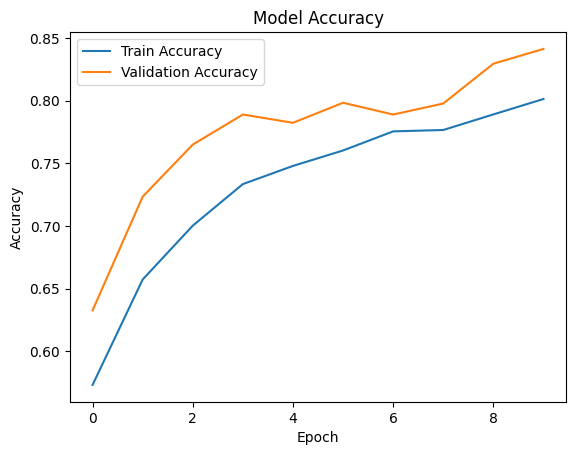

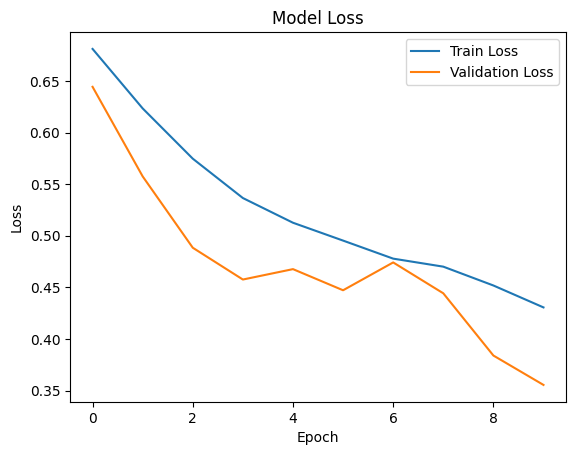

In [17]:
import matplotlib.pyplot as plt

# Accuracy grafiği
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss grafiği
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
model.save('/kaggle/working/cat_dog_cnn_model.h5')
